# Multi Layer Perceptron

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

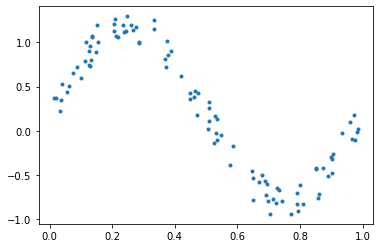

In [2]:
N = 100
X = np.random.rand(N, 1) # 2 dimension tensor
Y = np.sin(2 *np.pi * X) + 0.4 * np.random.rand(N, 1) # 2-d tensor
plt.plot(X, Y, '.')
plt.show()

In [3]:
def relu(x):
    return tf.where(x >= 0, x, 0)

class MLP():
    def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
        self.W = []
        self.activation = activation
        
        for i in range(1, len(neurons)):
            self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) # W
            self.W.append(tf.Variable(np.random.randn(neurons[i]))) #b

    
    def __call__(self, x):
        for i in range(0, len(self.W), 2): # W and bias 
            x = x @ self.W[i] + self.W[i+1]
            if self.activation[i // 2] is not None: # //2 beacuse step=2
                x = self.activation[i // 2](x)
        return x
    
    
    def fit(self, X, Y, lr=0.0001, epochs=2000):
        for epoch in range(epochs):
            with tf.GradientTape() as t:
                loss = tf.reduce_mean((self(X) - Y)**2)
            dW = t.gradient(loss, self.W)

            for i, W in enumerate(self.W):
                W.assign_sub(lr * dW[i])

            if epoch % 1000 == 0:
                print(epoch, loss.numpy())

In [6]:
model = MLP()
model.fit(X, Y, lr=0.0001, epochs=7000)

0 77.92165290034296
1000 0.03312961708909711
2000 0.02305854290024742
3000 0.01985238472299494
4000 0.01812942589711364
5000 0.01728205281006252
6000 0.016519093952549732


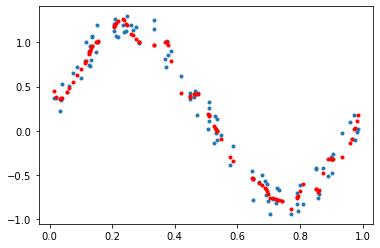

In [7]:
Z = model(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()